### Import Libraries

In [1]:
import tensorflow.keras.datasets as data
import tensorflow as tf
import matplotlib.pyplot as plt

### Load data

In [2]:
fashion = data.fashion_mnist

## Split data into training and testing

In [3]:
(train_images, train_labels), (test_images,test_labels)  = fashion.load_data()

### Display images

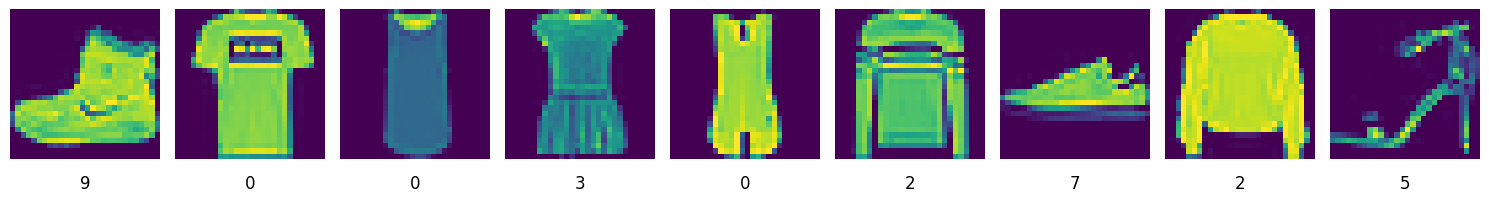

In [4]:
num_images = 9  # Number of images to display
plt.figure(figsize=(15, 5))  # Set figure size

for i in range(num_images):
    plt.subplot(1, num_images, i + 1)  # 1 row, num_images columns
    plt.imshow(train_images[i])
    plt.axis('off')  # Hide axis
    
    # Display the label below the image
    plt.text(0.5, -0.1, str(train_labels[i]), ha='center', va='top', fontsize=12, transform=plt.gca().transAxes)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

### Display grayscale images

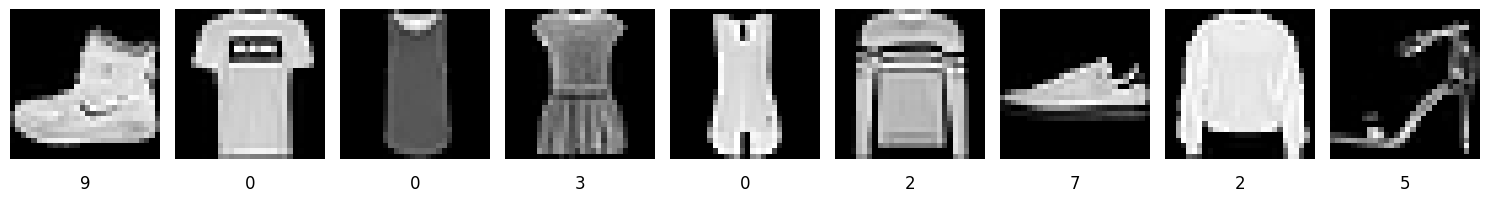

In [5]:
num_images = 9  # Number of images to display
plt.figure(figsize=(15, 5))  # Set figure size

for i in range(num_images):
    plt.subplot(1, num_images, i + 1)  # 1 row, num_images columns
    plt.imshow(train_images[i], cmap='gray')  # Use the 'gray' colormap for grayscale images
    plt.axis('off')  # Hide axis
    
    # Display the label below the image
    plt.text(0.5, -0.1, str(train_labels[i]), ha='center', va='top', fontsize=12, transform=plt.gca().transAxes)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

### Normalize the images

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

### Built model

In [7]:
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(28,28)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ]
)

### Compile the model

In [8]:
model.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy',metrics=['accuracy'])

### Implement callbacks

In [9]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') >= 0.9): # Experiment with changing this value
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

In [10]:
model.fit(train_images, train_labels, epochs=40, callbacks=callbacks)

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7784 - loss: 0.6335
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8611 - loss: 0.3887
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8783 - loss: 0.3379
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8846 - loss: 0.3138
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8901 - loss: 0.2937
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8979 - loss: 0.2766
Epoch 7/40
1868/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9030 - loss: 0.2634
Reached 90% accuracy so cancelling training!
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9030 - loss: 0.2634


### Evaluate model

In [11]:
model.evaluate(test_images,test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8813 - loss: 0.3398


[0.3396821916103363, 0.879800021648407]

### Predict images

In [12]:
x_predict = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


### Compare b/w actual and predicted

In [13]:
def compare_test(index):
    print("Actual Value is ", test_labels[index], " ", "Predicted Value is ", x_predict.flatten()[index])

In [15]:
for i in range (90, 99):
    compare_test(i)

Actual Value is  5   Predicted Value is  7.840571e-08
Actual Value is  3   Predicted Value is  1.2490864e-09
Actual Value is  6   Predicted Value is  5.4974497e-10
Actual Value is  7   Predicted Value is  1.1555041e-10
Actual Value is  1   Predicted Value is  9.159958e-10
Actual Value is  8   Predicted Value is  0.00010829439
Actual Value is  0   Predicted Value is  1.9093214e-09
Actual Value is  1   Predicted Value is  0.99987125
Actual Value is  4   Predicted Value is  2.814881e-07
